MovieWriter stderr:
convert-im6.q16: no images defined `/home/august/code/jupyter/Econometrics/class/pics/brownian_motion_markovian_drift.gif' @ error/convert.c/ConvertImageCommand/3229.



CalledProcessError: Command '['convert', '-size', '640x480', '-depth', '8', '-delay', '3.3333333333333335', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', '/home/august/code/jupyter/Econometrics/class/pics/brownian_motion_markovian_drift.gif']' returned non-zero exit status 1.

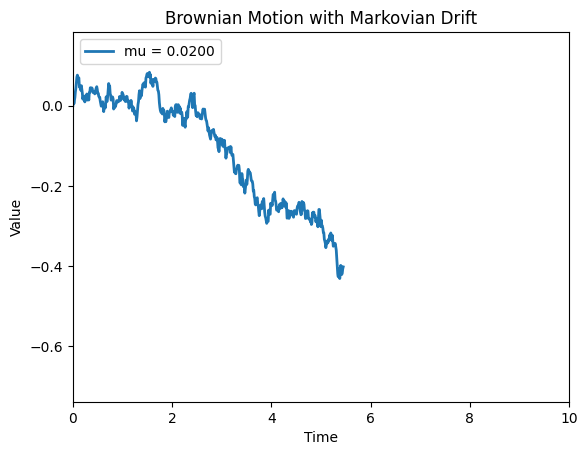

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters for the simulation
num_steps = 1000  # Number of steps in the Brownian motion
dt = 0.01         # Time interval
sigma = 0.1       # Volatility

# Markov process states and transition probabilities
states = [-0.02, 0, 0.02]  # Possible values for mu (drift)
transition_matrix = [
    [0.9, 0.05, 0.05],   # Transition probabilities from state 1
    [0.05, 0.9, 0.05],   # Transition probabilities from state 2
    [0.05, 0.05, 0.9]    # Transition probabilities from state 3
]

def simulate_brownian_motion(num_steps, dt, sigma, states, transition_matrix):
    # Initialize arrays to store Brownian motion and mu values
    brownian_motion = np.zeros(num_steps)
    mu_values = np.zeros(num_steps)

    # Initial state for the Markov process
    current_state = np.random.choice(len(states))
    mu_values[0] = states[current_state]

    # Simulate the Brownian motion with Markovian drift
    for i in range(1, num_steps):
        # Simulate Markov process for drift
        current_state = np.random.choice(len(states), p=transition_matrix[current_state])
        mu = states[current_state]
        mu_values[i] = mu

        # Brownian motion step
        brownian_motion[i] = brownian_motion[i-1] + mu*dt + sigma*np.sqrt(dt)*np.random.normal()

    return brownian_motion, mu_values

# Simulating the Brownian motion
brownian_motion, mu_values = simulate_brownian_motion(num_steps, dt, sigma, states, transition_matrix)

# Plotting and creating the GIF
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, num_steps*dt)
ax.set_ylim(min(brownian_motion) - 0.1, max(brownian_motion) + 0.1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Brownian Motion with Markovian Drift')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, i*dt, i)
    y = brownian_motion[:i]
    line.set_data(x, y)
    ax.legend([f"mu = {mu_values[i-1]:.4f}"], loc='upper left')
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=num_steps, interval=10, blit=True)

# Saving the animation as a GIF
gif_path = '/home/august/code/jupyter/Econometrics/class/pics/brownian_motion_markovian_drift.gif'
ani.save(gif_path, writer='imagemagick', fps=30)

gif_path

